## Dual Annealing Hyperparameter Experiments Pipeline

In [89]:
%pwd
%cd ../..

/


In [90]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import run_dual_annealing

In [137]:
# lists of hyperparameter values to test
init_temp_vals = [0.01, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000]
res_temp_vals = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.5, 0.75, 0.99]
vis_vals = [1.05, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 2.95]
acpt_vals = [-9.999e3, -1e3, -1e2, -1e1, 0, -1, -2, -3, -4,-5]

In [133]:
# initialize problem to test
problem_name = 'ackley'
problem = PROBLEMS_BY_NAME[problem_name]
global_minimum = problem['global_minimum']
print('Global minimum: {}'.format(global_minimum))

Global minimum: 0.0


### Initial Temperature Experiment

In [134]:
init_temp_results = pd.DataFrame()
for i in range(len(init_temp_vals)):
    outputs = run_dual_annealing(problem, trials=10, init_temp=init_temp_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1]) 
    init_temp_results[init_temp_vals[i]] = fn_results

In [94]:
init_temp_results

,0.01,10.00,50.00,100.00,250.00,500.00,1000.00,2500.00,5000.00,10000.00,15000.00,20000.00,25000.00,30000.00,40000.00,50000.00
0,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09
1,2.579928e+00,2.133423e-09,1.290680e-08,1.258746e-08,3.497360e-08,1.236656e-08,9.616386e-09,1.954794e-08,1.482293e-08,3.481518e-09,1.645756e-08,1.055131e-08,1.027042e-08,1.951200e-08,1.711895e-08,2.301871e-08
2,1.425104e-10,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09
3,4.368106e-11,2.755904e-09,4.185271e-09,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08
4,7.166638e-09,4.169593e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09
5,2.579928e+00,2.996178e-09,1.875376e-08,3.898184e-09,1.164377e-08,1.852986e-08,3.622588e-08,1.474285e-08,2.000005e-08,1.805199e-08,4.410559e-09,4.990501e-09,9.044819e-09,2.024502e-08,1.631540e-08,1.448957e-08
6,2.579928e+00,4.631215e-10,1.942164e-08,1.358567e-08,8.888197e-09,1.998009e-08,1.516769e-08,1.537473e-08,1.466938e-08,1.992363e-08,7.200832e-09,3.812588e-09,2.172786e-08,2.010370e-08,2.911961e-09,1.880715e-08
7,2.579928e+00,2.419761e-09,9.612787e-09,1.947069e-08,5.970989e-09,8.925700e-09,1.849357e-08,1.917856e-08,6.109410e-09,7.754111e-09,1.633001e-08,1.912321e-08,1.211818e-08,1.366537e-08,1.983072e-08,5.145541e-09
8,3.574452e+00,6.042818e-09,1.558398e-08,1.773285e-08,2.135551e-08,1.191970e-08,1.412538e-08,1.075560e-08,1.853152e-08,6.196970e-09,1.321920e-08,1.104583e-08,1.085645e-08,1.987750e-08,1.672557e-08,5.411533e-10
9,1.196246e-08,3.292695e-09,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08


In [ ]:
for i in range(len(init_temp_vals)):
    print(init_temp_results[init_temp_vals[i]].value_counts())

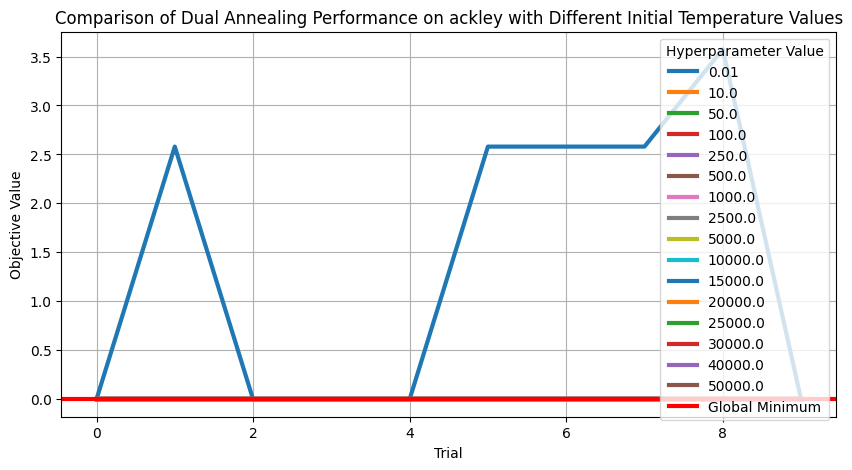

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
init_temp_results[init_temp_vals].plot(lw=3, figsize=(10,5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(f'Comparison of Dual Annealing Performance on {problem_name} with Different Initial Temperature Values')
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/dual_annealing/{problem_name}/init_temp.png'
)

### Restart Temperature Ratio Experiments

In [96]:
res_temp_results = pd.DataFrame()
for i in range(len(res_temp_vals)):
    outputs = run_dual_annealing(problem, trials=10, res_temp=res_temp_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1]) 
    res_temp_results[res_temp_vals[i]] = fn_results

In [97]:
res_temp_results

,0.000001,0.000010,0.000100,0.001000,0.010000,0.100000,0.250000,0.500000,0.750000,0.990000
0,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09
1,1.869636e-08,1.869636e-08,1.869636e-08,1.350465e-08,2.579928e+00,2.579928e+00,1.065957e-08,2.579928e+00,2.579928e+00,2.579928e+00
2,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09
3,1.610469e-08,1.610469e-08,1.609792e-08,1.609792e-08,1.609792e-08,1.609792e-08,1.609792e-08,1.609792e-08,1.609792e-08,1.609792e-08
4,7.262134e-09,7.262134e-09,6.963333e-09,6.963333e-09,6.963333e-09,6.963333e-09,6.963333e-09,6.963333e-09,6.963333e-09,6.963333e-09
5,1.903263e-08,1.903263e-08,1.903263e-08,1.982451e-08,8.283938e-10,9.058788e-09,2.579928e+00,2.579928e+00,2.579928e+00,2.579928e+00
6,2.597439e-09,2.597439e-09,2.597439e-09,2.597439e-09,1.537695e-08,2.579928e+00,2.579928e+00,7.679482e-09,7.679482e-09,7.679482e-09
7,7.822742e-09,7.822742e-09,7.822742e-09,7.822742e-09,2.579928e+00,2.579928e+00,3.705708e-09,2.579928e+00,2.579928e+00,2.579928e+00
8,1.412099e-08,1.412099e-08,1.412099e-08,1.412099e-08,1.292057e-08,2.579928e+00,1.528696e-08,3.574452e+00,3.574452e+00,3.574452e+00
9,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08


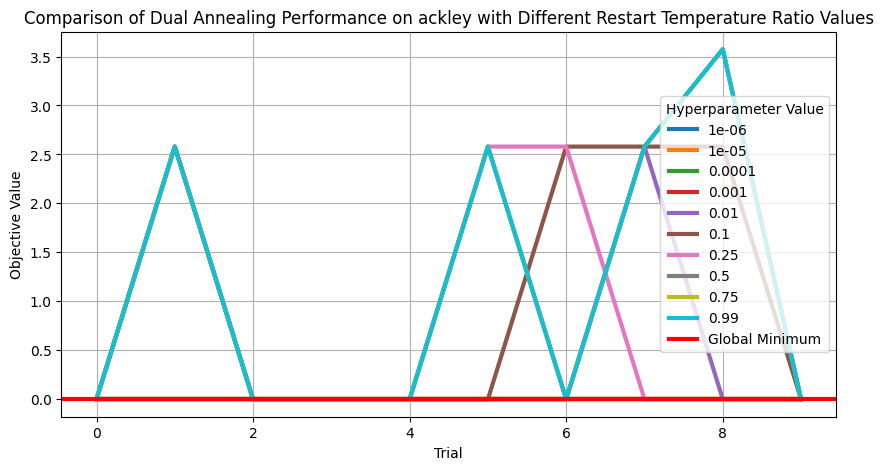

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
res_temp_results[res_temp_vals].plot(lw=3, figsize=(10,5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(f'Comparison of Dual Annealing Performance on {problem_name} with Different Restart Temperature Ratio Values')
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/dual_annealing/{problem_name}/res_temp.png'
)

### Visiting Distribution Experiments

In [98]:
vis_results = pd.DataFrame()
for i in range(len(vis_vals)):
    outputs = run_dual_annealing(problem, trials=10, vis=vis_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1]) 
    vis_results[vis_vals[i]] = fn_results

In [99]:
vis_results

,1.05,1.25,1.50,1.75,2.00,2.25,2.50,2.75,2.95
0,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09
1,1.213827e-08,2.050709e-08,1.534757e-08,1.800335e-08,1.515348e-08,1.566916e-08,3.690165e-09,1.027585e-08,9.399852e-09
2,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09
3,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.609792e-08,1.609792e-08
4,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,6.963333e-09,6.963333e-09
5,1.990768e-08,1.245454e-08,1.463278e-08,1.878525e-08,1.887028e-09,1.138833e-09,1.363492e-08,1.410862e-08,1.374395e-08
6,1.169315e-08,2.761745e-09,1.300077e-08,9.708114e-09,9.206449e-09,1.717966e-08,7.856670e-09,4.576080e-09,1.835237e-08
7,1.673743e-08,2.010551e-08,8.490780e-09,1.588281e-08,1.184356e-08,8.972691e-09,1.641399e-08,1.337456e-08,8.993223e-09
8,2.021388e-08,1.061144e-08,1.783793e-08,1.546365e-08,7.262912e-09,1.833529e-08,8.414329e-09,1.910021e-08,1.201378e-08
9,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08


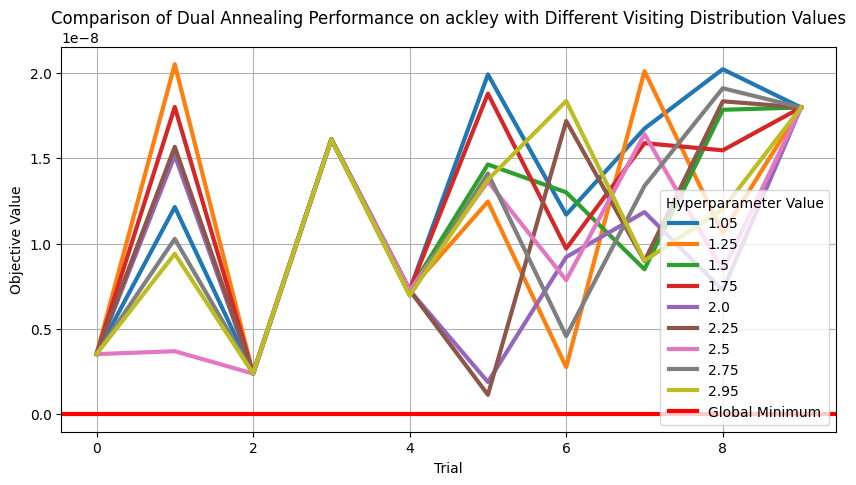

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
vis_results[vis_vals].plot(lw=3, figsize=(10,5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(f'Comparison of Dual Annealing Performance on {problem_name} with Different Visiting Distribution Values')
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/dual_annealing/{problem_name}/vis.png'
)

### Acceptance Distribution Experiments

In [100]:
acpt_results = pd.DataFrame()
for i in range(len(acpt_vals)):
    outputs = run_dual_annealing(problem, trials=10, acpt=acpt_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1]) 
    acpt_results[acpt_vals[i]] = fn_results

In [101]:
acpt_results

,-9999,-1000,-100,-10,0,-1,-2,-3,-4,-5
0,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09,3.522171e-09
1,1.107135e-08,1.107135e-08,1.107135e-08,7.122396e-09,1.342628e-09,1.983100e-08,1.747424e-08,3.219132e-09,1.618223e-08,1.869636e-08
2,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09,2.381885e-09
3,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08,1.610469e-08
4,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09,7.262134e-09
5,1.013997e-08,1.013997e-08,3.145381e-08,1.662585e-08,1.970333e-08,1.790637e-08,1.694702e-08,1.694702e-08,1.903263e-08,1.903263e-08
6,1.866537e-08,1.866537e-08,1.686070e-08,2.676871e-08,7.683888e-09,7.683888e-09,2.017483e-08,1.250184e-08,2.597439e-09,2.597439e-09
7,1.461183e-08,1.461183e-08,1.285524e-08,7.822742e-09,1.889108e-08,1.784819e-08,2.035109e-08,2.035109e-08,9.967153e-09,7.822742e-09
8,3.669371e-09,3.669371e-09,1.901448e-08,6.763863e-09,1.562715e-08,1.051050e-08,1.051050e-08,1.051050e-08,1.422222e-08,1.412099e-08
9,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08,1.797099e-08


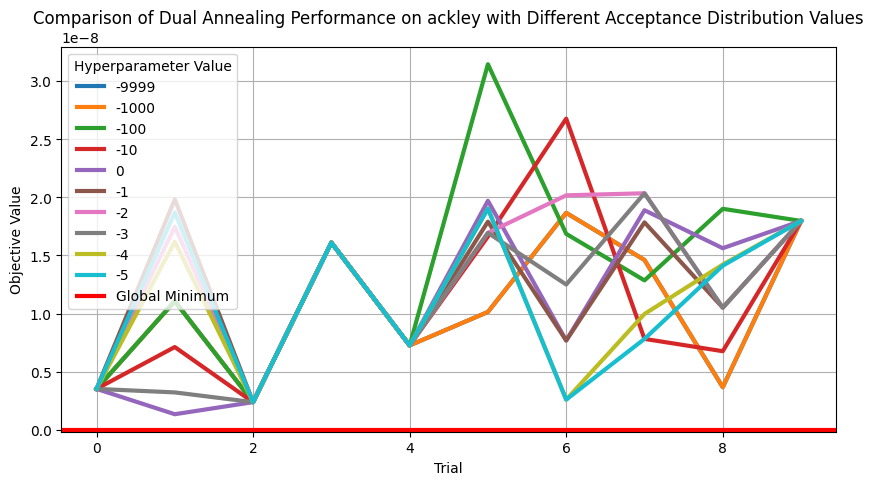

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
acpt_results[acpt_vals].plot(lw=3, figsize=(10,5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(f'Comparison of Dual Annealing Performance on {problem_name} with Different Acceptance Distribution Values')
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/dual_annealing/{problem_name}/acpt.png'
)